In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('Train_Data.csv')


ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )


# Train Data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [3]:
data.drop(['ID_Patient_Care_Situation',"Patient_ID"], axis =1, inplace=True)

In [4]:
#check is there any duplicates
check_duplicate = data.duplicated().sum()
check_duplicate

48

In [5]:
data.drop_duplicates(keep=False,inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.Treated_with_drugs.value_counts()

DX6                     8541
DX5                     1905
DX2                     1894
DX1                     1831
DX3                     1822
DX4                     1790
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX3 DX5                  407
DX1 DX4                  406
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [8]:
data.Patient_Smoker.value_counts()

NO            13196
YES            9793
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [9]:
data.Patient_Rural_Urban.value_counts()

RURAL    16059
URBAN     6943
Name: Patient_Rural_Urban, dtype: int64

In [10]:
data.Patient_mental_condition.value_counts()

Stable    23002
Name: Patient_mental_condition, dtype: int64

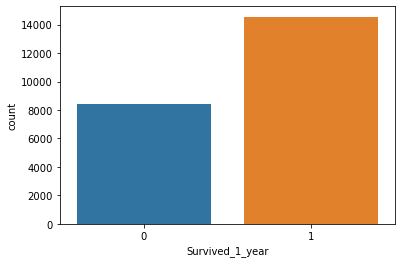

In [11]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

# EDA for numerical values

In [12]:
# getting only the numerical features
numeric_features = data.select_dtypes(include=[np.number]) 
numeric_features.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [13]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]  
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
0,8,56,18.479385,2.0
1,5,36,22.945566,1.0
2,23,48,27.510027,1.0
3,51,5,19.130976,1.0
4,0,128,1.348400,1.0


In [14]:
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1225
dtype: int64

In [15]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0]) 
numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
dtype: int64

In [16]:
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
count,23002.000000,23002.000000,23002.000000,23002.000000
mean,26.425311,33.187592,23.452987,1.710243
std,15.030150,19.544513,3.808902,0.768374
min,0.000000,0.000000,1.089300,1.000000
25%,13.000000,16.000000,20.205050,1.000000
50%,26.000000,33.000000,23.385161,2.000000
75%,39.000000,50.000000,26.788491,2.000000
max,52.000000,149.000000,29.999579,5.000000


## Finding the correlation of numerical values


<AxesSubplot:>

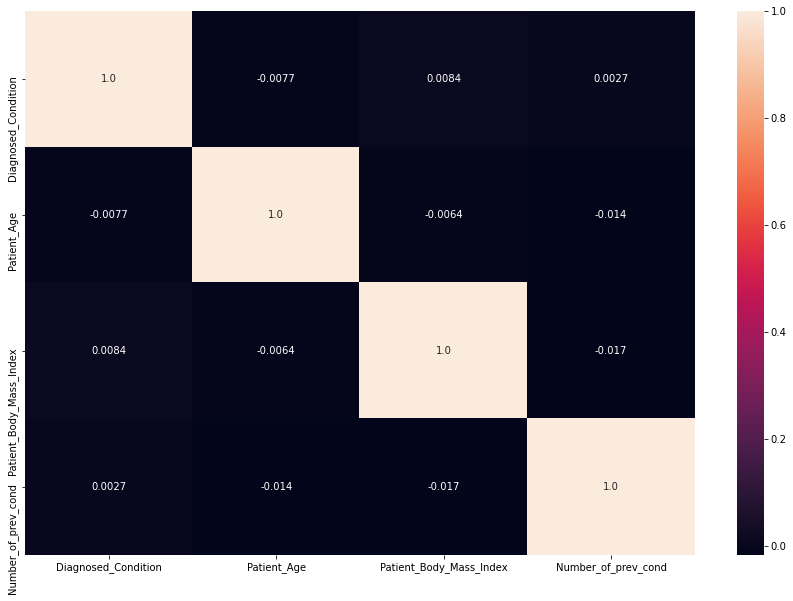

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(),annot=True,fmt='.2')

In [18]:
data.isnull().sum()

Diagnosed_Condition            0
Treated_with_drugs            13
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1225
B                           1225
C                           1225
D                           1225
E                           1225
F                           1225
Z                           1225
Number_of_prev_cond            0
Survived_1_year                0
dtype: int64

In [19]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [20]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [21]:
data.isnull().sum()

Diagnosed_Condition         0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
dtype: int64

In [22]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [23]:
data = pd.concat([data, drugs], axis=1)
data = data.drop('Treated_with_drugs', axis=1) 
data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,5,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,0,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [24]:
data.Patient_Smoker.value_counts()

NO            13196
YES            9793
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [25]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'

In [26]:
data.Patient_mental_condition.value_counts()

Stable    23002
Name: Patient_mental_condition, dtype: int64

In [27]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)

In [28]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23096
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23002 non-null  int64  
 1   Patient_Age                23002 non-null  int64  
 2   Patient_Body_Mass_Index    23002 non-null  float64
 3   A                          23002 non-null  float64
 4   B                          23002 non-null  float64
 5   C                          23002 non-null  float64
 6   D                          23002 non-null  float64
 7   E                          23002 non-null  float64
 8   F                          23002 non-null  float64
 9   Z                          23002 non-null  float64
 10  Number_of_prev_cond        23002 non-null  float64
 11  Survived_1_year            23002 non-null  int64  
 12  DX1                        23002 non-null  int64  
 13  DX2                        23002 non-null  int

In [30]:
data.isnull().sum()

Diagnosed_Condition          0
Patient_Age                  0
Patient_Body_Mass_Index      0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
Patient_Smoker_NO            0
Patient_Smoker_YES           0
Patient_Rural_Urban_RURAL    0
Patient_Rural_Urban_URBAN    0
dtype: int64

In [31]:
data.to_csv("cleaned.csv",index=False)

In [32]:
cleaned = pd.read_csv('cleaned.csv')
cleaned

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,3,14,18.643448,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,1,0,0,1,0,1,0
22998,41,55,23.684585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
22999,24,63,27.500039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
23000,11,25,23.719125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0


In [33]:
X = cleaned.drop('Survived_1_year',axis = 1)
y = cleaned['Survived_1_year']

## Fix the imbalanced data

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    14547
1    14547
Name: Survived_1_year, dtype: int64

## Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [36]:
X_test.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
27968,35,49,17.739866,1.0,0.048562,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
14483,38,33,27.878059,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1
8144,27,64,18.446694,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
15961,48,27,29.984592,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
17688,27,43,25.393030,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,1,1,0,1,0,0,0,1,1,0


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 27968 to 8459
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        5819 non-null   int64  
 1   Patient_Age                5819 non-null   int64  
 2   Patient_Body_Mass_Index    5819 non-null   float64
 3   A                          5819 non-null   float64
 4   B                          5819 non-null   float64
 5   C                          5819 non-null   float64
 6   D                          5819 non-null   float64
 7   E                          5819 non-null   float64
 8   F                          5819 non-null   float64
 9   Z                          5819 non-null   float64
 10  Number_of_prev_cond        5819 non-null   float64
 11  DX1                        5819 non-null   int64  
 12  DX2                        5819 non-null   int64  
 13  DX3                        5819 non-null   i

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [39]:
#Predicting the Test set result
y_pred = clf_rf.predict(X_test)

In [40]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8571919573809933
0.8597941623080816
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2908
           1       0.84      0.88      0.86      2911

    accuracy                           0.86      5819
   macro avg       0.86      0.86      0.86      5819
weighted avg       0.86      0.86      0.86      5819



# Logistic Regression

In [41]:
model = LogisticRegression(max_iter = 1000) 
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7499570372916309
0.752340425531915
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2908
           1       0.75      0.76      0.75      2911

    accuracy                           0.75      5819
   macro avg       0.75      0.75      0.75      5819
weighted avg       0.75      0.75      0.75      5819



# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
clf_tree.fit(X_train,y_train)

y_pred = clf_tree.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8140573981783812
0.8145990404386566
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2908
           1       0.81      0.82      0.81      2911

    accuracy                           0.81      5819
   macro avg       0.81      0.81      0.81      5819
weighted avg       0.81      0.81      0.81      5819



# KNeighborsClassifier

In [43]:
#Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

#Fitting K-NN to the training set3
clf_knn = KNeighborsClassifier(n_neighbors =9, metric='minkowski',p=2) #set the K values
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [44]:
#Predicting y values using predict method in the class
y_pred = clf_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7504725897920604
0.729608938547486
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2908
           1       0.80      0.67      0.73      2911

    accuracy                           0.75      5819
   macro avg       0.76      0.75      0.75      5819
weighted avg       0.76      0.75      0.75      5819



# XgBoost

In [45]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(eval_metric='logloss')
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8604571232170476
0.8623262122753476
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2908
           1       0.85      0.87      0.86      2911

    accuracy                           0.86      5819
   macro avg       0.86      0.86      0.86      5819
weighted avg       0.86      0.86      0.86      5819



# Naives Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

clf_gb = GaussianNB()
clf_gb.fit(X_train,y_train)

y_pred = clf_gb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6640316205533597
0.5465089306425424
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      2908
           1       0.84      0.40      0.55      2911

    accuracy                           0.66      5819
   macro avg       0.72      0.66      0.64      5819
weighted avg       0.72      0.66      0.64      5819



# Support Vector Machine

In [47]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='poly',random_state=0)
clf_svc.fit(X_train,y_train)

y_pred = clf_svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7396459872830383
0.751517139576841
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      2908
           1       0.72      0.79      0.75      2911

    accuracy                           0.74      5819
   macro avg       0.74      0.74      0.74      5819
weighted avg       0.74      0.74      0.74      5819



# Pre-processing of Test Data

In [49]:
pharma_data = pd.read_csv('Test_Data.csv')
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [50]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [51]:
pharma_data.drop(columns=['Patient_mental_condition', 'ID_Patient_Care_Situation', 'Patient_ID'], inplace = True, axis = 1)

In [52]:
# apply one-hot enconder to one column
drugs = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [53]:
# Place the DataFrames side by side
pharma_data = pd.concat([pharma_data, drugs], axis = 1)

# drop columns
pharma_data = pharma_data.drop(columns=['Treated_with_drugs'], axis = 1)

In [54]:
pharma_data = pd.get_dummies(pharma_data,['Patient_Rural_Urban','Patient_Smoker'])

## Prediction with Pharma_data

In [55]:
prediction = clf_xgb.predict(pharma_data)
prediction

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [56]:
prediction_data = pd.DataFrame(prediction)
prediction_data.to_csv("prediction.csv",header=["prediction"],index=False )